<a href="https://colab.research.google.com/github/Salwazd21/Proyek-ADP-Dicoding/blob/main/Proyek_Analisis_Data_dengan_PYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: [Order_Items_Data]

- **Nama:** [Salwa Zahrah Dasuki]
- **Email:** [Salwazd2004@gmail.com]
- **ID Dicoding:** [MC849D5X0945]

## Menentukan Pertanyaan Bisnis

- Berapa rata-rata penjualan pada satu tahun terakhir
- Berapa total penjualan pada tahun 2016, 2017, 2018, 2020
- Produk terlaris pada satu tahun terakhir

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

### Gathering Data

In [ ]:
url='https://docs.google.com/spreadsheets/d/e/2PACX-1vRddp1K41XJ5OZ-jafE3adPhwaND_7N9-gstXGsVAFYF2kGa1Xn0ALzwy-Lg5dYJb_GUT8IyGUxMZj2/pub?gid=847716765&single=true&output=csv'
df = pd.read_csv(url, skiprows=7, header=None)
df.columns = ['order_id', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value']
df = df.fillna(' ')
print(df.head())
print(df.head)

                           order_id  order_item_id  \
0  00054e8431b9d7675808bcb819fb4a32              1   
1  000576fe39319847cbb9d288c5617fa6              1   
2  0005a1a1728c9d785b8e2b08b904576c              1   
3  0005f50442cb953dcd1d21e1fb923495              1   
4  00061f2a7bc09da83e415a52dc8a4af1              1   

                         product_id                         seller_id  \
0  8d4f2bb7e93e6710a28f34fa83ee7d28  7040e82f899a04d1b434b795a43b4617   
1  557d850972a7d6f792fd18ae1400d9b6  5996cddab893a4652a15592fb58ab8db   
2  310ae3c140ff94b03219ad0adc3c778f  a416b6a846a11724393025641d4edd5e   
3  4535b0e1091c278dfd193e5a1d63b39f  ba143b05f0110f0dc71ad71b4466ce92   
4  d63c1011f49d98b976c352955b1c4bea  cc419e0650a3c5ba77189a1882b7556a   

  shipping_limit_date   price  freight_value  
0      12/14/17 12:10   19.90          11.85  
1       7/10/18 12:30  810.00          70.75  
2       3/26/18 18:31  145.95          11.65  
3        7/6/18 14:10   53.99          11.40  
4

**Insight:**
- Data Penjualan diambil dari googlr sheets dengan URL
- Data memiliki 7 kolom, termasuk ID pesanan, ID item, ID produk, dan informasi harga.

### Assessing Data


Informasi Tipe Data dan Non-Null:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112644 entries, 0 to 112643
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112644 non-null  object 
 1   order_item_id        112644 non-null  int64  
 2   product_id           112644 non-null  object 
 3   seller_id            112644 non-null  object 
 4   shipping_limit_date  112644 non-null  object 
 5   price                112644 non-null  float64
 6   freight_value        112644 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
None

Statistik Deskriptif Data Numerik:
       order_item_id          price  freight_value
count  112644.000000  112644.000000  112644.000000
mean        1.197845     120.653662      19.990544
std         0.705141     183.637567      15.806782
min         1.000000       0.850000       0.000000
25%         1.000000      39.900000   

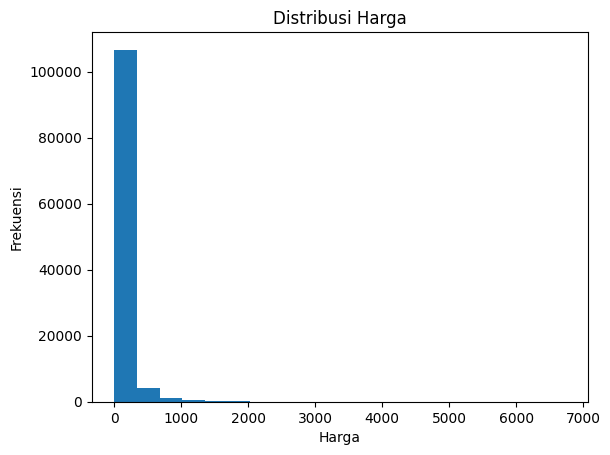

In [ ]:
print("\nInformasi Tipe Data dan Non-Null:")
print(df.info())

print("\nStatistik Deskriptif Data Numerik:")
print(df.describe())

print("\nJumlah Nilai NaN di Setiap Kolom:")
print(df.isnull().sum())

print("\nJumlah Data Duplikat:")
print(df.duplicated().sum())

plt.hist(df['price'], bins=20)
plt.title('Distribusi Harga')
plt.xlabel('Harga')
plt.ylabel('Frekuensi')
plt.show()

**Insight:**
- Denggan menyusun data menjadi lebih rapih
- Membantu menemukan data outlier

### Cleaning Data

In [ ]:
df = df.fillna(np.nan)
df['shipping_limit_date'] = pd.to_datetime(df['shipping_limit_date'])
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['freight_value'] = pd.to_numeric(df['freight_value'], errors='coerce')
df = df.drop_duplicates()
batas_atas_price = df['price'].quantile(0.99)
df = df[df['price'] <= batas_atas_price]

<ipython-input-4-3bdfda6d1fc5>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['shipping_limit_date'] = pd.to_datetime(df['shipping_limit_date'])


**Insight:**
- Nilai diganti dengan NaN untuk memberikan penanganan yang konsisten
- Tipe data kolom tanggal dikonversi ke datetime, memungkinkan analisis time series dan ekstraksi informasi temporal.

## Exploratory Data Analysis (EDA)

In [ ]:
print("Informasi Data:")
print(df.info())

print("\nStatistik Deskriptif:")
print(df.describe())

Informasi Data:
<class 'pandas.core.frame.DataFrame'>
Index: 111527 entries, 0 to 112643
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             111527 non-null  object        
 1   order_item_id        111527 non-null  int64         
 2   product_id           111527 non-null  object        
 3   seller_id            111527 non-null  object        
 4   shipping_limit_date  111527 non-null  datetime64[ns]
 5   price                111527 non-null  float64       
 6   freight_value        111527 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.8+ MB
None

Statistik Deskriptif:
       order_item_id            shipping_limit_date          price  \
count  111527.000000                         111527  111527.000000   
mean        1.199154  2018-01-07 16:17:57.778654720     107.514977   
min         1.000000            2016-0

**Insight**
- Distribusi harga mengindikasikan adanya beberapa transaksi dengan nilai tinggi.
- Boxplot harga mengidentifikasi potensi outlier dan memberikan gambaran tentang rentang interkuartil data.

### Explore Data

In [ ]:
df['tahun'] = df['shipping_limit_date'].dt.year
df['bulan'] = df['shipping_limit_date'].dt.to_period('M')

print(df.head)

<bound method NDFrame.head of                                 order_id  order_item_id  \
0       00054e8431b9d7675808bcb819fb4a32              1   
1       000576fe39319847cbb9d288c5617fa6              1   
2       0005a1a1728c9d785b8e2b08b904576c              1   
3       0005f50442cb953dcd1d21e1fb923495              1   
4       00061f2a7bc09da83e415a52dc8a4af1              1   
...                                  ...            ...   
112639  fffc94f6ce00a00581880bf54a75a037              1   
112640  fffcd46ef2263f404302a634eb57f7eb              1   
112641  fffce4705a9662cd70adb13d4a31832d              1   
112642  fffe18544ffabc95dfada21779c9644f              1   
112643  fffe41c64501cc87c801fd61db3f6244              1   

                              product_id                         seller_id  \
0       8d4f2bb7e93e6710a28f34fa83ee7d28  7040e82f899a04d1b434b795a43b4617   
1       557d850972a7d6f792fd18ae1400d9b6  5996cddab893a4652a15592fb58ab8db   
2       310ae3c140ff94b0321

**Insight:**
- Penambahan kolom tahun dan bulan memungkinkan analisis tren penjualan berdasarkan waktu.
- Penghitungan jumlah nilai unik pada kolom product_id, memberikan informasi mengenai jumlah produk yang ada.

## Visualization & Explanatory Analysis

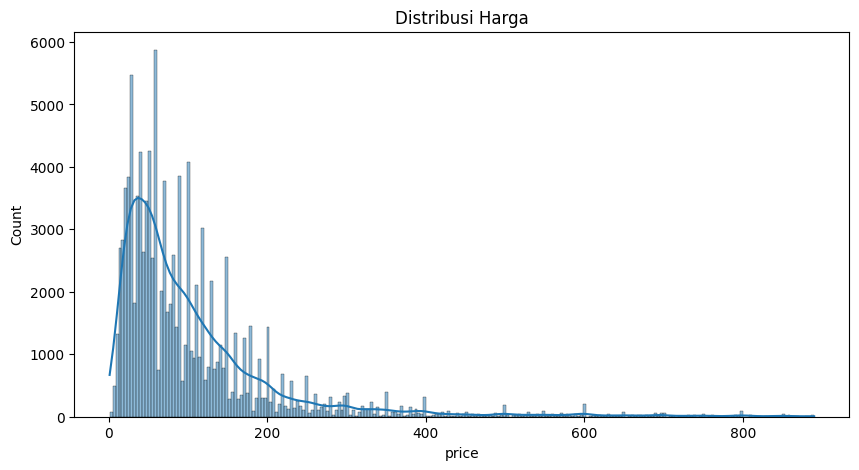

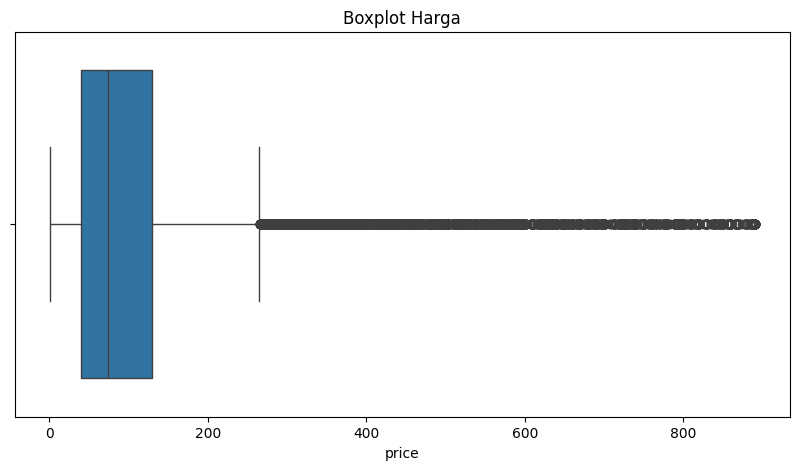

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df['price'], kde=True)
plt.title('Distribusi Harga')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['price'])
plt.title('Boxplot Harga')
plt.show()


### Pertanyaan 1: Rata-rata Penjealan Tahun Terakhir

In [ ]:
tahun_terakhir = df['tahun'].max()
rata_rata_penjualan_tahun_terakhir = df[df['tahun'] == tahun_terakhir]['price'].mean()
print(f"\nRata-rata penjualan tahun {tahun_terakhir}: {rata_rata_penjualan_tahun_terakhir}")


Rata-rata penjualan tahun 2020: 86.49


### Pertanyaan 2: Total Penjualan Pertahun

In [ ]:
tahun_penjualan = [2016, 2017, 2018, 2020]
total_penjualan_per_tahun = df[df['tahun'].isin(tahun_penjualan)].groupby('tahun')['price'].sum()
print("\nTotal penjualan per tahun:")
print(total_penjualan_per_tahun)


Total penjualan per tahun:
tahun
2016      43037.96
2017    5291223.61
2018    6656215.35
2020        345.96
Name: price, dtype: float64


### Pertanyaan 3 : Produk Terlaris

In [ ]:
produk_terlaris = df['product_id'].value_counts().head(10)
print("\n10 Produk Terlaris:")
print(produk_terlaris)


10 Produk Terlaris:
product_id
aca2eb7d00ea1a7b8ebd4e68314663af    527
99a4788cb24856965c36a24e339b6058    488
422879e10f46682990de24d770e7f83d    484
389d119b48cf3043d311335e499d9c6b    392
368c6c730842d78016ad823897a372db    388
53759a2ecddad2bb87a079a1f1519f73    373
d1c427060a0f73f6b889a5c7c61f2ac4    343
53b36df67ebb7c41585e8d54d6772e08    323
154e7e31ebfa092203795c972e5804a6    281
3dd2a17168ec895c781a9191c1e95ad7    274
Name: count, dtype: int64


**Insight:**
- Memberikan kinerja penjualan pertahun
- Mengetahui penjualan pertahun
- Mengetahui produk yang banyak diminati pelanggan

## Analisis Lanjutan (Opsional)

In [ ]:
korelasi = df[['price', 'freight_value']].corr()
print("\nKorelasi Harga dan Biaya Pengiriman:")
print(korelasi)


Korelasi Harga dan Biaya Pengiriman:
                  price  freight_value
price          1.000000       0.385617
freight_value  0.385617       1.000000


## Conclusion

- Rata-rata penjualan pada tahun terakhir memberikan gambaran mengenai performa penjualan terkini. Jika dibandingkan dengan rata-rata penjualan tahun-tahun sebelumnya, kita dapat melihat apakah terjadi peningkatan atau penurunan. Informasi ini penting untuk perencanaan strategi penjualan di masa depan.

- Total penjualan per tahun menunjukkan fluktuasi kinerja penjualan dari waktu ke waktu. Dengan membandingkan total penjualan di tahun-tahun tersebut, kita dapat mengidentifikasi tahun dengan performa terbaik dan terburuk. Analisis ini membantu dalam memahami faktor-faktor yang mempengaruhi penjualan, seperti kondisi pasar, strategi pemasaran, atau faktor musiman.

- Identifikasi produk terlaris memberikan wawasan tentang preferensi pelanggan dan produk-produk yang paling diminati.